In [1]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os
#%matplotlib notebook

In [2]:
ra=88.047400
dec=-7.456247

In [3]:
#disp=DispatcherAPI(host='https://www.astro.unige.ch/cdci/astrooda/dispatch-data',instrument='mock',protocol='https')
cookies=dict(_oauth2_proxy=open('token').read().strip())
disp=DispatcherAPI(host='analyse-staging-1.2.reproducible.online/dispatch-data',instrument='mock',cookies=cookies,protocol='https')

In [4]:
f = open('scws_NGC2110_isgri_10deg.txt', 'r')
scws=[]
for line in f:
    line = line.strip()
    columns = line.split()
    scws.append(columns[0])
f.close()
m=int(len(scws)/50.)
print(m)
scw_lists=[]
for i in range(m):
    count=0
    j=0    
    scw_string=''
    while(count<50):
        scw_string=scw_string+str(scws[50*i+count])+','
        count=count+1
    scw_lists.append(scw_string[:-1])

24


In [5]:
data=disp.get_product(instrument='isgri',
                      product='isgri_image',
                      scw_list=scw_lists[0],
                      E1_keV=20.0,
                      E2_keV=40.0,
                      osa_version='OSA10.2',
                      RA=ra,
                      DEC=dec,
                      detection_threshold=5.0,
                      product_type='Real')

waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data


query done succesfully!


In [6]:
data.dispatcher_catalog_1.table
api_cat=data.dispatcher_catalog_1.get_api_dictionary()

In [7]:
lc_results=[]
for i in range(len(scw_lists)):
#for i in range(1):
    print i
    data=disp.get_product(instrument='isgri',
                            product='isgri_lc',
                            scw_list=scw_lists[i],
                            E1_keV=20,
                            E2_keV=60,
                            time_bin=10000,
                            time_bin_format='sec',
                            query_type='Real',
                            osa_version='OSA10.2',
                            RA=ra,
                            DEC=dec,
                            detection_threshold=5.0,
                            radius=15.,
                            product_type='Real',
                            selected_catalog=api_cat)
    lc_results.append(data)

0
waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=3071631882664420358  358 

query done succesfully!
1
waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data
the job has been submitted on the remote server
 / the job is working remotely, please wait status=done - job_id=-7048468512595746040  040 

query done succesfully!
2
waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data
the job has been submitted on the remote server
 - the job is working remotely, please wait status=done - job_id=7743794297441827270  270 

query done succesfully!
3
waiting for remote response, please wait run_analysis https://analyse-staging-1.2.reproducible.online/dispatch-data
the job has been submitted on the r

In [15]:
import numpy as np
from numpy import sqrt,exp
import matplotlib.pyplot as plt
%matplotlib inline
t=[]
r=[]
err=[]
i=0
for lc in lc_results:
    for ID,s in enumerate(lc._p_list):
        if s.meta_data['src_name']=='NGC 2110':
            i=i+1
            for tt in s.data_unit[1].data['TIME']:
                t.append(tt)
            for rr in s.data_unit[1].data['RATE']:
                r.append(rr)
            for ee in s.data_unit[1].data['ERROR']:
                err.append(ee)
t=np.array(t)
r=np.array(r)
err=np.array(err)

Text(52700,7.5,'20-60 keV')

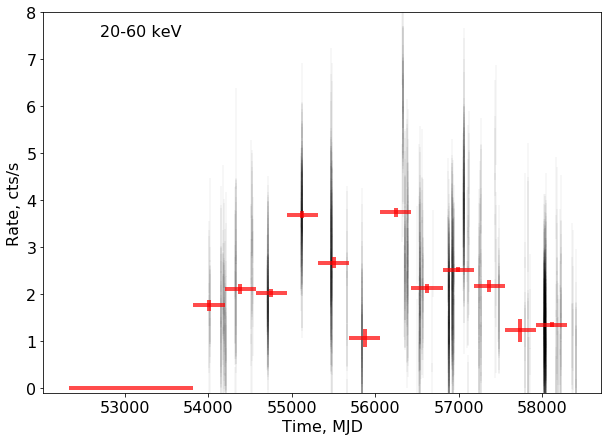

In [14]:
fig = plt.figure(figsize=(10,7))
t0=51544
Nbins=16
time=np.linspace(52700,58300,Nbins)
dtime=time[1]-time[0]
time_av=time-dtime/2.
flux=np.zeros(Nbins)
error=np.zeros(Nbins)
j=0
sc=1.

k=0
while (j<len(time)):
    while ((t[k]+t0<time[j])):
        if (err[k]>0.):
            flux[j]=flux[j]+r[k]/(err[k])**2
            error[j]=error[j]+1./(err[k])**2
        k=k+1
        if (k==len(t)):
            break
    if (k==len(t)):
        break
    else:
        j=j+1
plt.errorbar(t+t0,r*exp((t+t0-52900)/40000.),yerr=err*exp((t+t0-52900)/40000.),linestyle='none',color='black',alpha=0.03,linewidth=2)

for i in range(len(flux)):
    if(error[i]>0.):
        flux[i]=flux[i]/(error[i])*exp((time_av[i]-52900)/40000.)
        error[i]=1./sqrt(error[i])*exp((time_av[i]-52900)/40000.)
plt.errorbar(time_av,flux,yerr=error,xerr=dtime/2.,linestyle='none',color='red',alpha=0.7,linewidth=4)
#plt.plot(time_av,exp((time_av-52900)/40000.)/2)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(-0.1,8.)
plt.xlabel('Time, MJD',fontsize=16)
plt.ylabel('Rate, cts/s',fontsize=16)
plt.text(52700,7.5, '20-60 keV',fontsize=16)
